In [2]:
from abc import ABC, abstractmethod

In [34]:
from dataclasses import dataclass
import dataclasses

In [122]:
from typing import (Generic, TypeVar, 
                    Sequence, Callable)

In [91]:
from random import randint

In [92]:
import statistics

In [93]:
A = TypeVar("A")

In [94]:
class Distribution(ABC, Generic[A]):
    @abstractmethod
    def sample(self) -> A:
        pass
    
    def sample_n(self, n: int) -> Sequence[A]:
        return [self.sample() for _ in range(n)]

In [95]:
import random
class Die(Distribution[int]):
    def __init__(self, sides):
        self.sides = sides
    def sample(self):
        return random.randint(1, self.sides)
    def __repr__(self):
        return f"Die(sides={self.sides})"
    def __eq__(self, other):
        if isinstance(other, Die):
            return self.sides == other.sides

six_sided = Die(6)
def roll_dice():
    return six_sided.sample() + six_sided.sample()

In [96]:
Die(6) == Die(6)

True

In [97]:
Die(6) == None

In [98]:
@dataclass(frozen = True)
class Die(Distribution):
    sides: int
    
    def sample(self) -> int:
        return random.randint(1, self.sides)

In [99]:
d = Die(6)
d.sides

6

In [104]:
d6  = Die(6)
d20 = dataclasses.replace(d6, sides = 20)

In [105]:
{d6: "abs"}

{Die(sides=6): 'abs'}

In [106]:
def expected_value(d: Distribution[float], n: int = 100) -> float:
    return statistics.mean(d.sample() for _ in range(n))

In [107]:
samples = distribution.sample_n(100)

NameError: name 'distribution' is not defined

In [108]:
import numpy as np

In [109]:
@dataclass
class Gaussian(Distribution[float]):
    μ: float
    σ: float
    
    def sample(self) -> float:
        return np.random.normal(loc   = self.μ, 
                                scale = self.σ)
    
    def sample_n(self, n: int) -> Sequence[float]:
        return np.random.normal(loc   = self.μ,
                                scale = self.σ,
                                size  = n)

In [115]:
import timeit

In [116]:
d = Gaussian(μ = 0, σ = 1)

In [117]:
timeit.timeit(lambda: [d.sample() for _ in range(100)])

86.40327654103749

In [118]:
timeit.timeit(lambda: d.sample_n(100))

3.5806342910509557

In [119]:
from __future__ import annotations

In [120]:
# class methods are used to model behavior

In [124]:
def repeat(action: Callable[[int, str], [bool]], n: int):
    for _ in range(n):
        action()

In [125]:
def expected_value(
    d: Distribution[A],
    f: Callable[[A], float],
    n: int
) -> float:
    return statistics.mean(f(d.sample()) for _ in range(n))

In [126]:
def payoff(coin: Coin) -> float:
    return 1.0 if coin == "heads" else 0.0

In [168]:
@dataclass(frozen=True)
class Coin(Distribution[str]):
    def sample():
        return "heads" if random.random() < 0.5 else "tails"

In [169]:
c = Coin

In [178]:
coin_flip = c.sample()

In [179]:
payoff(coin_flip)

1.0

In [192]:
expected_value(d = c, f = payoff, n = 100)

0.44

In [208]:
expected_value(d = c, f = lambda coin: 1.0 if coin == "heads" else 0.0, n = 10)

0.5

In [217]:
def sqrt(a: float, threshold: float) -> float:
    x   = a / 2 # initial guess
    x_n = a
    while abs(x_n - x) > threshold:
        x   = x_n
        x_n = (x + (a / x_n)) / 2
    return x_n

In [218]:
print(sqrt(a = 55, threshold = 0.01))

7.416198913250979


In [221]:
for x in range(3): print(x)

0
1
2


In [222]:
def sqrt(a: float) -> Iterator[float]:
    x = a / 2 # initial guess
    while True:
        x = (x + (a / x)) / 2
        yield x

In [223]:
import itertools

In [228]:
iterations = list(itertools.islice(sqrt(25), 10))
iterations[0:5]

[7.25,
 5.349137931034482,
 5.011394106532552,
 5.000012953048684,
 5.000000000016778]

In [229]:
def converge(values:    Iterator[float], 
             threshold: float
            ) -> Iterator[float]:
    for a, b in itertools.pairwise(values):
        yield a
        
        if abs(a - b) < threshold:
            break

In [234]:
results = converge(sqrt(25), 0.001)
capped_results = itertools.islice(results, 10000)

In [236]:
list(capped_results)

[7.25, 5.349137931034482, 5.011394106532552, 5.000012953048684]

# Chapter 3

In [239]:
import numpy as np
from dataclasses import dataclass

In [242]:
@dataclass
class Process1:
    @dataclass
    class State:
        price: int
    
    level_param: int
    alpha1:      float
    
    def up_prob(self, state: State) -> float:
        return 1. / (1 + np.exp(-self.alpha1 * (self.level_param - state.price)))
    
    def next_state(self, state: State) -> State:
        up_move: int = np.random.binomial(1, self.up_prob(state), 1)[0]
        return Process1.State(price = state.price + up_move * 2 - 1)

In [243]:
def simulation(process, start_state):
    start = start_state
    while True:
        yield state
        state = process.next_state(state)

In [244]:
import itertools

In [245]:
def process1_price_traces(
    start_price: int,
    level_param: int,
    alpha1:      float,
    time_steps:  int,
    num_traces:  int
) -> np.ndarray:
    process = Process1(level_param = level_param, alpha1 = alpha1)
    start_state = Process1.State(price = start_price)
    return np.vstack([
        np.fromiter((s.price for s in itertools.islice(
            simulation(process, start_state),
            time_steps + 1
        )), float) for _ in range(num_traces)])

In [246]:
from dataclasses import dataclass
from typing import Optional, Mapping, Sequence, Tuple
from collections import Counter
import numpy as np
from numpy.random import binomial
import itertools
from operator import itemgetter
from rl.gen_utils.common_funcs import get_logistic_func, get_unit_sigmoid_func

In [247]:
@dataclass
class Process1:
    @dataclass
    class State:
        price: int

    level_param: int  # level to which price mean-reverts
    alpha1: float = 0.25  # strength of mean-reversion (non-negative value)

    def up_prob(self, state: State) -> float:
        return get_logistic_func(self.alpha1)(self.level_param - state.price)

    def next_state(self, state: State) -> State:
        up_move: int = binomial(1, self.up_prob(state), 1)[0]
        return Process1.State(price=state.price + up_move * 2 - 1)

In [248]:
handy_map: Mapping[Optional[bool], int] = {True: -1, False: 1, None: 0}

In [250]:
@dataclass
class Process2:
    @dataclass
    class State:
        price: int
        is_prev_move_up: Optional[bool]

    alpha2: float = 0.75  # strength of reverse-pull (value in [0,1])

    def up_prob(self, state: State) -> float:
        return 0.5 * (1 + self.alpha2 * handy_map[state.is_prev_move_up])

    def next_state(self, state: State) -> State:
        up_move: int = binomial(1, self.up_prob(state), 1)[0]
        return Process2.State(
            price=state.price + up_move * 2 - 1,
            is_prev_move_up=bool(up_move)
        )

In [251]:
@dataclass
class Process3:
    @dataclass
    class State:
        num_up_moves: int
        num_down_moves: int

    alpha3: float = 1.0  # strength of reverse-pull (non-negative value)

    def up_prob(self, state: State) -> float:
        total = state.num_up_moves + state.num_down_moves
        return get_unit_sigmoid_func(self.alpha3)(
            state.num_down_moves / total
        ) if total else 0.5

    def next_state(self, state: State) -> State:
        up_move: int = binomial(1, self.up_prob(state), 1)[0]
        return Process3.State(
            num_up_moves=state.num_up_moves + up_move,
            num_down_moves=state.num_down_moves + 1 - up_move
        )

In [252]:
def simulation(process, start_state):
    state = start_state
    while True:
        yield state
        state = process.next_state(state)

In [253]:
def process1_price_traces(
    start_price: int,
    level_param: int,
    alpha1: float,
    time_steps: int,
    num_traces: int
) -> np.ndarray:
    process = Process1(level_param=level_param, alpha1=alpha1)
    start_state = Process1.State(price=start_price)
    return np.vstack([
        np.fromiter((s.price for s in itertools.islice(
            simulation(process, start_state),
            time_steps + 1
        )), float) for _ in range(num_traces)])

In [254]:
def process2_price_traces(
    start_price: int,
    alpha2: float,
    time_steps: int,
    num_traces: int
) -> np.ndarray:
    process = Process2(alpha2=alpha2)
    start_state = Process2.State(price=start_price, is_prev_move_up=None)
    return np.vstack([
        np.fromiter((s.price for s in itertools.islice(
            simulation(process, start_state),
            time_steps + 1
        )), float) for _ in range(num_traces)])

In [255]:
def process3_price_traces(
    start_price: int,
    alpha3:      float,
    time_steps:  int,
    num_traces:  int
) -> np.ndarray:
    process = Process3(alpha3=alpha3)
    start_state = Process3.State(num_up_moves=0, num_down_moves=0)
    return np.vstack([
        np.fromiter((start_price + s.num_up_moves - s.num_down_moves
                    for s in itertools.islice(simulation(process, start_state),
                                              time_steps + 1)), float)
        for _ in range(num_traces)])

In [256]:
def plot_single_trace_all_processes(
    process1_trace: np.ndarray,
    process2_trace: np.ndarray,
    process3_trace: np.ndarray
) -> None:

    from rl.gen_utils.plot_funcs import plot_list_of_curves

    traces_len: int = len(process1_trace)

    plot_list_of_curves(
        [range(traces_len)] * 3,
        [process1_trace, process2_trace, process3_trace],
        ["r-", "b--", "g-."],
        [
            r"Process 1 ($\alpha_1=0.25$)",
            r"Process 2 ($\alpha_2=0.75$)",
            r"Process 3 ($\alpha_3=1.0$)"
        ],
        "Time Steps",
        "Stock Price",
        "Single-Trace Simulation for Each Process"
    )

In [258]:
def get_terminal_histogram(
    price_traces: np.ndarray
) -> Tuple[Sequence[int], Sequence[int]]:
    pairs: Sequence[Tuple[int, int]] = sorted(
        list(Counter(price_traces[:, -1]).items()),
        key=itemgetter(0)
    )
    return [x for x, _ in pairs], [y for _, y in pairs]

In [259]:
def plot_distribution_at_time_all_processes(
    process1_traces: np.ndarray,
    process2_traces: np.ndarray,
    process3_traces: np.ndarray
) -> None:

    from rl.gen_utils.plot_funcs import plot_list_of_curves

    num_traces: int = len(process1_traces)
    time_steps: int = len(process1_traces[0]) - 1

    x1, y1 = get_terminal_histogram(process1_traces)
    x2, y2 = get_terminal_histogram(process2_traces)
    x3, y3 = get_terminal_histogram(process3_traces)

    plot_list_of_curves(
        [x1, x2, x3],
        [y1, y2, y3],
        ["r-", "b--", "g-."],
        [
            r"Process 1 ($\alpha_1=0.25$)",
            r"Process 2 ($\alpha_2=0.75$)",
            r"Process 3 ($\alpha_3=1.0$)"
        ],
        "Terminal Stock Price",
        "Counts",
        f"Terminal Price Counts (T={time_steps:d}, Traces={num_traces:d})"
    )

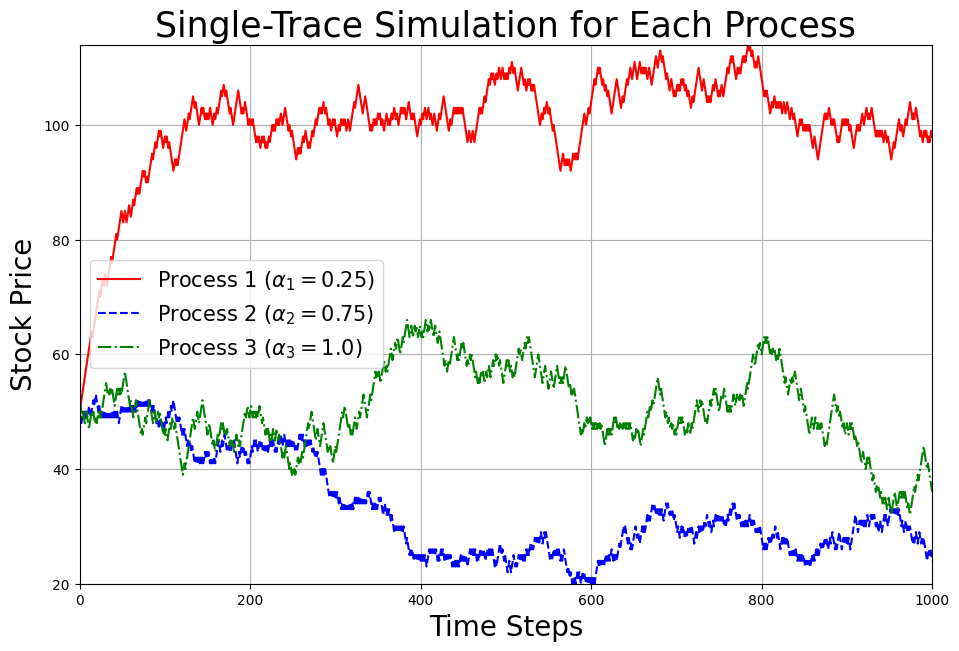

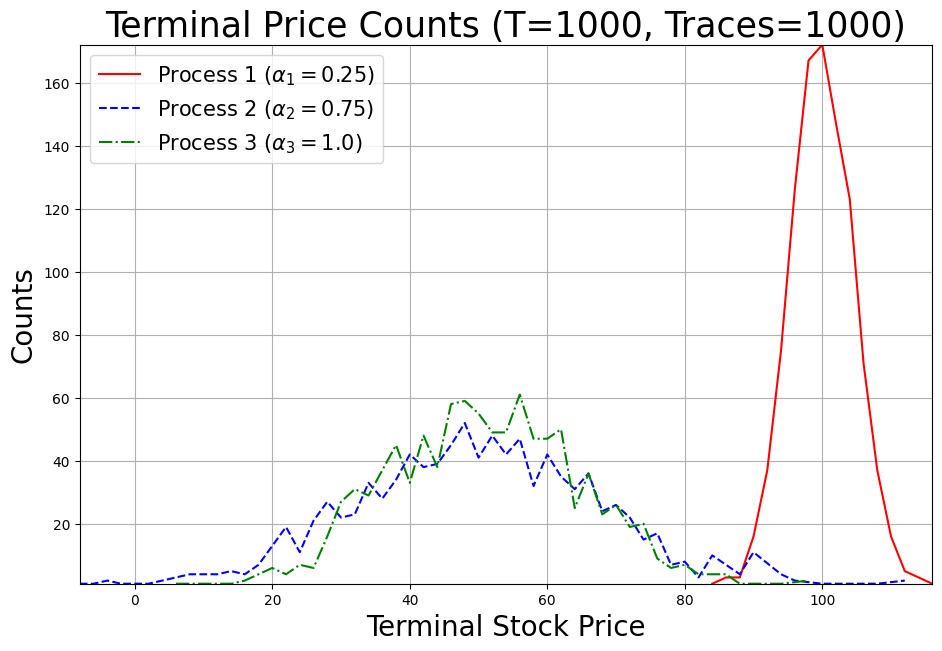

In [264]:
if __name__ == '__main__':
    start_price: int = 50
    level_param: int = 100
    alpha1: float = 0.05
    alpha2: float = 0.5
    alpha3: float = 2.0
    time_steps: int = 1000
    num_traces: int = 1000

    process1_traces: np.ndarray = process1_price_traces(
        start_price=start_price,
        level_param=level_param,
        alpha1=alpha1,
        time_steps=time_steps,
        num_traces=num_traces
    )
    process2_traces: np.ndarray = process2_price_traces(
        start_price=start_price,
        alpha2=alpha2,
        time_steps=time_steps,
        num_traces=num_traces
    )
    process3_traces: np.ndarray = process3_price_traces(
        start_price=start_price,
        alpha3=alpha3,
        time_steps=time_steps,
        num_traces=num_traces
    )

    trace1 = process1_traces[0]
    trace2 = process2_traces[0]
    trace3 = process3_traces[0]

    plot_single_trace_all_processes(trace1, trace2, trace3)

    plot_distribution_at_time_all_processes(
        process1_traces,
        process2_traces,
        process3_traces
    )

## 3.3.3 Markov Process Implementation

In [276]:
from abc import ABC
from dataclasses import dataclass
from typing import Generic, Callable, TypeVar, Iterable
from rl.distribution import Distribution

In [268]:
S = TypeVar('S')
X = TypeVar('X')

In [269]:
class State(ABC, Generic[S]):
    state: S
    
    def on_non_terminal(
        self, 
        f: Callable[[NonTerminal[S]], X],
        default: X
    ) -> X:
        if isinstance(self, NonTerminal):
            return f(self)
        else:
            return default

In [270]:
@dataclass(frozen = True)
class Terminal(State[S]):
    state: S

@dataclass(frozen = True)
class NonTerminal(State[S]):
    state: S

In [277]:
class MarkovProcess(ABC, Generic[S]):
    @abstractmethod
    def transition(self, state: NonTerminal[S]) -> Distribution[State[S]]:
        pass
    
    def simulate(
        self,
        start_state_distribution: Distribution[NonTerminal[S]]
    ) -> Iterable[State[S]]:
        state: State[S] = start_state_distribution.sample()
        yield state
        
        while isinstance(state, NonTerminal):
            state = self.transition(state).sample()
            yield state

In [281]:
from rl.distribution import Categorical
from rl.gen_utils.common_funcs import get_unit_sigmoid_func

In [282]:
@dataclass
class StateMP3:
    num_up_moves:   int
    num_down_moves: int

In [283]:
@dataclass
class StockPriceMP3(MarkovProcess[StateMP3]):
    
    alpha3: float = 1.0 
    
    def up_prob(self, state: StateMP3) -> float:
        total = state.num_up_moves + state.num_down_moves
        return get_unit_sigmoid_func(self.alpha3)(state.num_down_moves / total
        ) if total else 0.5
    
    def transition(
        self,
        state: NonTerminal[StateMP3]
    ) -> Categorical[State[StateMP3]]:
        up_p = self.up_prob(state.state)
        return Categorical({
            NonTerminal(StateMP3(
                state.state.num_up_moves + 1, state.state.num_down_moves
            )): up_p,
            NonTerminal(StateMP3(
                state.state.num_up_moves, state.state.num_down_moves + 1
            )): 1 - up_p
        })

In [284]:
from rl.distribution import Constant
import numpy as np

In [285]:
def process3_price_traces(
    start_price: int,
    alpha3: float,
    time_steps: int,
    num_traces: int
) -> np.ndarray:
    mp = StockPriceMP3(alpha3=alpha3)
    start_state_distribution = Constant(
        NonTerminal(StateMP3(num_up_moves=0, num_down_moves=0))
    )
    return np.vstack([np.fromiter(
        (start_price + s.state.num_up_moves - s.state.num_down_moves for s in
        itertools.islice(
            mp.simulate(start_state_distribution),
            time_steps + 1
        )),
        float
    ) for _ in range(num_traces)])

## Code Import

In [301]:
from dataclasses import dataclass
from typing import Optional, Mapping
import numpy as np
import itertools
from rl.distribution import Categorical, Constant, FiniteDistribution
from rl.markov_process import MarkovProcess, NonTerminal, State
from rl.gen_utils.common_funcs import get_logistic_func, get_unit_sigmoid_func
from rl.chapter2.stock_price_simulations import\
    plot_single_trace_all_processes
from rl.chapter2.stock_price_simulations import\
    plot_distribution_at_time_all_processes

In [287]:
@dataclass(frozen=True)
class StateMP1:
    price: int

In [288]:
@dataclass
class StockPriceMP1(MarkovProcess[StateMP1]):

    level_param: int  # level to which price mean-reverts
    alpha1: float = 0.25  # strength of mean-reversion (non-negative value)

    def up_prob(self, state: StateMP1) -> float:
        return get_logistic_func(self.alpha1)(self.level_param - state.price)

    def transition(
        self,
        state: NonTerminal[StateMP1]
    ) -> Categorical[State[StateMP1]]:
        up_p = self.up_prob(state.state)
        return Categorical({
            NonTerminal(StateMP1(state.state.price + 1)): up_p,
            NonTerminal(StateMP1(state.state.price - 1)): 1 - up_p
        })

In [289]:
@dataclass(frozen=True)
class StateMP2:
    price: int
    is_prev_move_up: Optional[bool]

In [290]:
handy_map: Mapping[Optional[bool], int] = {True: -1, False: 1, None: 0}

In [291]:
@dataclass
class StockPriceMP2(MarkovProcess[StateMP2]):

    alpha2: float = 0.75  # strength of reverse-pull (value in [0,1])

    def up_prob(self, state: StateMP2) -> float:
        return 0.5 * (1 + self.alpha2 * handy_map[state.is_prev_move_up])

    def transition(
        self,
        state: NonTerminal[StateMP2]
    ) -> Categorical[State[StateMP2]]:
        up_p = self.up_prob(state.state)
        return Categorical({
            NonTerminal(StateMP2(state.state.price + 1, True)): up_p,
            NonTerminal(StateMP2(state.state.price - 1, False)): 1 - up_p
        })

In [292]:
@dataclass(frozen=True)
class StateMP3:
    num_up_moves: int
    num_down_moves: int

In [293]:
@dataclass
class StockPriceMP3(MarkovProcess[StateMP3]):

    alpha3: float = 1.0  # strength of reverse-pull (non-negative value)

    def up_prob(self, state: StateMP3) -> float:
        total = state.num_up_moves + state.num_down_moves
        return get_unit_sigmoid_func(self.alpha3)(
            state.num_down_moves / total
        ) if total else 0.5

    def transition(
        self,
        state: NonTerminal[StateMP3]
    ) -> Categorical[State[StateMP3]]:
        up_p = self.up_prob(state.state)
        return Categorical({
            NonTerminal(StateMP3(
                state.state.num_up_moves + 1, state.state.num_down_moves
            )): up_p,
            NonTerminal(StateMP3(
                state.state.num_up_moves, state.state.num_down_moves + 1
            )): 1 - up_p
        })

In [294]:
def process1_price_traces(
    start_price: int,
    level_param: int,
    alpha1: float,
    time_steps: int,
    num_traces: int
) -> np.ndarray:
    mp = StockPriceMP1(level_param=level_param, alpha1=alpha1)
    start_state_distribution = Constant(
        NonTerminal(StateMP1(price=start_price))
    )
    return np.vstack([
        np.fromiter((s.state.price for s in itertools.islice(
            mp.simulate(start_state_distribution),
            time_steps + 1
        )), float) for _ in range(num_traces)])

In [295]:
def process2_price_traces(
    start_price: int,
    alpha2: float,
    time_steps: int,
    num_traces: int
) -> np.ndarray:
    mp = StockPriceMP2(alpha2=alpha2)
    start_state_distribution = Constant(
        NonTerminal(StateMP2(price=start_price, is_prev_move_up=None))
    )
    return np.vstack([
        np.fromiter((s.state.price for s in itertools.islice(
            mp.simulate(start_state_distribution),
            time_steps + 1
        )), float) for _ in range(num_traces)])

In [296]:
def process3_price_traces(
    start_price: int,
    alpha3: float,
    time_steps: int,
    num_traces: int
) -> np.ndarray:
    mp = StockPriceMP3(alpha3=alpha3)
    start_state_distribution = Constant(
        NonTerminal(StateMP3(num_up_moves=0, num_down_moves=0))
    )
    return np.vstack([np.fromiter(
        (start_price + s.state.num_up_moves - s.state.num_down_moves for s in
         itertools.islice(
             mp.simulate(start_state_distribution),
             time_steps + 1
         )),
        float
    ) for _ in range(num_traces)])

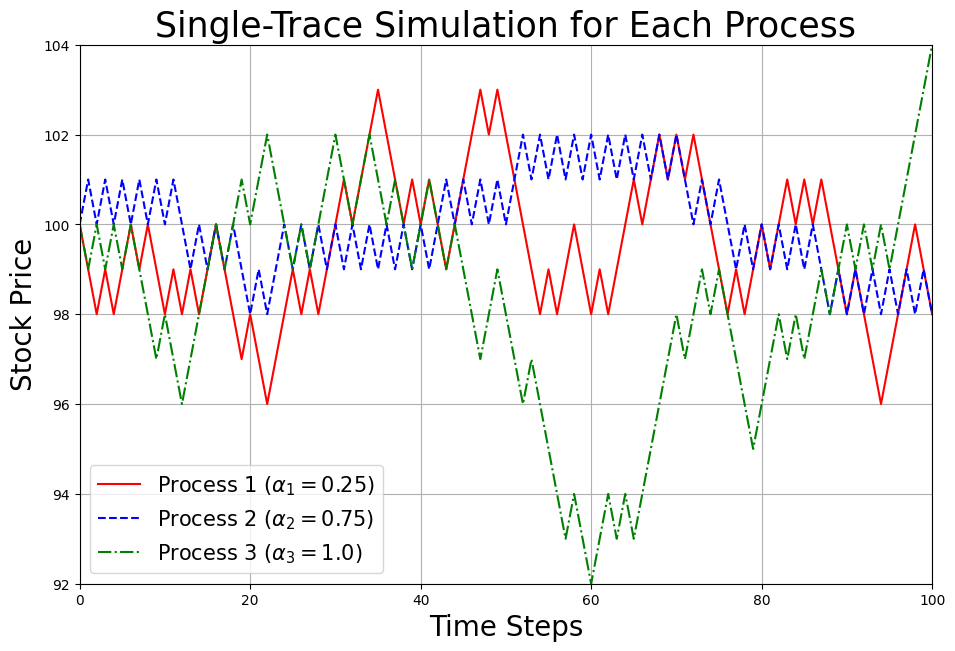

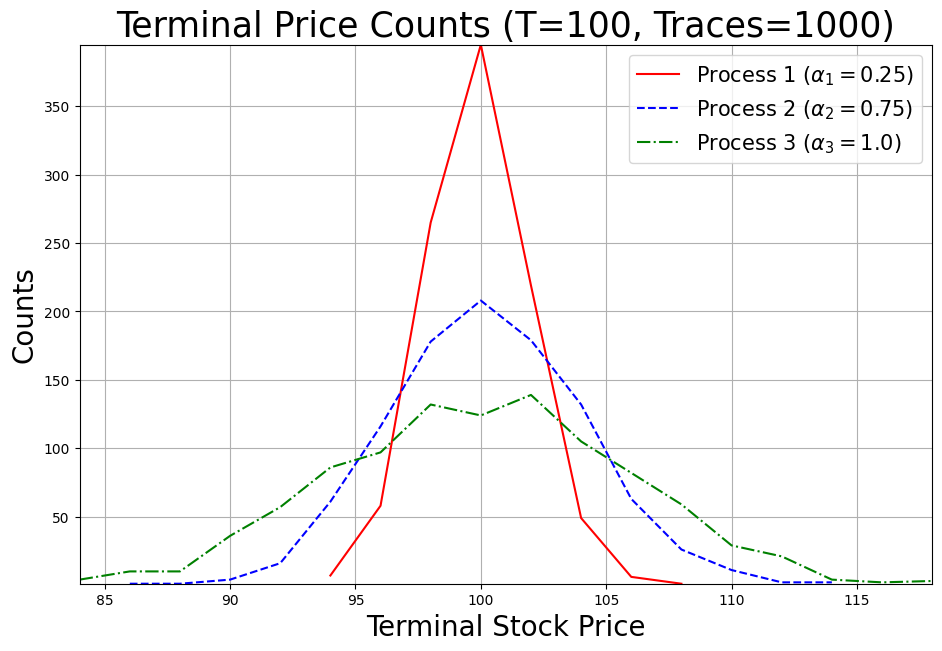

In [297]:
if __name__ == '__main__':
    start_price: int = 100
    level_param: int = 100
    alpha1: float = 0.25
    alpha2: float = 0.75
    alpha3: float = 1.0
    time_steps: int = 100
    num_traces: int = 1000

    process1_traces: np.ndarray = process1_price_traces(
        start_price=start_price,
        level_param=level_param,
        alpha1=alpha1,
        time_steps=time_steps,
        num_traces=num_traces
    )
    process2_traces: np.ndarray = process2_price_traces(
        start_price=start_price,
        alpha2=alpha2,
        time_steps=time_steps,
        num_traces=num_traces
    )
    process3_traces: np.ndarray = process3_price_traces(
        start_price=start_price,
        alpha3=alpha3,
        time_steps=time_steps,
        num_traces=num_traces
    )

    trace1 = process1_traces[0]
    trace2 = process2_traces[0]
    trace3 = process3_traces[0]

    plot_single_trace_all_processes(trace1, trace2, trace3)

    plot_distribution_at_time_all_processes(
        process1_traces,
        process2_traces,
        process3_traces
    )


In [300]:
{
    'Rain' : Categorical({'Rain': 0.3, 'Nice': 0.7}),
    'Snow' : Categorical({'Rain': 0.4, 'Snow': 0.6}),
    'Nice' : Categorical({'Rain': 0.2, 'Snow': 0.3})
}

{'Rain': {'Rain': 0.3, 'Nice': 0.7},
 'Snow': {'Rain': 0.4, 'Snow': 0.6},
 'Nice': {'Rain': 0.4, 'Snow': 0.6}}

In [305]:
Transition = Mapping[NonTerminal[S], FiniteDistribution[State[S]]]
Transition

typing.Mapping[rl.markov_process.NonTerminal[~S], rl.distribution.FiniteDistribution[rl.markov_process.State[~S]]]

In [312]:
class FiniteMarkovProcess(MarkovProcess[S]):
    '''A Markov Process with a finite state space.

    Having a finite state space lets us use tabular methods to work
    with the process (ie dynamic programming).

    '''

    non_terminal_states: Sequence[NonTerminal[S]]
    transition_map: Transition[S]

    def __init__(self, transition_map: Mapping[S, FiniteDistribution[S]]):
        non_terminals: Set[S] = set(transition_map.keys())
        self.transition_map = {
            NonTerminal(s): Categorical(
                {(NonTerminal(s1) if s1 in non_terminals else Terminal(s1)): p
                 for s1, p in v}
            ) for s, v in transition_map.items()
        }
        self.non_terminal_states = list(self.transition_map.keys())

    def __repr__(self) -> str:
        display = ""

        for s, d in self.transition_map.items():
            display += f"From State {s.state}:\n"
            for s1, p in d:
                opt = "Terminal " if isinstance(s1, Terminal) else ""
                display += f"  To {opt}State {s1.state} with Probability {p:.3f}\n"

        return display

    def get_transition_matrix(self) -> np.ndarray:
        sz = len(self.non_terminal_states)
        mat = np.zeros((sz, sz))

        for i, s1 in enumerate(self.non_terminal_states):
            for j, s2 in enumerate(self.non_terminal_states):
                mat[i, j] = self.transition(s1).probability(s2)

        return mat

    def transition(self, state: NonTerminal[S])\
            -> FiniteDistribution[State[S]]:
        return self.transition_map[state]

    def get_stationary_distribution(self) -> FiniteDistribution[S]:
        eig_vals, eig_vecs = np.linalg.eig(self.get_transition_matrix().T)
        index_of_first_unit_eig_val = np.where(
            np.abs(eig_vals - 1) < 1e-8)[0][0]
        eig_vec_of_unit_eig_val = np.real(
            eig_vecs[:, index_of_first_unit_eig_val])
        return Categorical({
            self.non_terminal_states[i].state: ev
            for i, ev in enumerate(eig_vec_of_unit_eig_val /
                                   sum(eig_vec_of_unit_eig_val))
        })

    def display_stationary_distribution(self):
        print({
            s: round(p, 3)
            for s, p in self.get_stationary_distribution()
        })

    def generate_image(self) -> graphviz.Digraph:
        d = graphviz.Digraph()

        for s in self.transition_map.keys():
            d.node(str(s))

        for s, v in self.transition_map.items():
            for s1, p in v:
                d.edge(str(s), str(s1), label=str(p))

        return d

In [307]:
from scipy.stats import poisson

In [313]:
@dataclass(frozen=True)
class InventoryState:
    on_hand: int
    on_order: int

    def inventory_position(self) -> int:
        return self.on_hand + self.on_order

In [320]:
conda install python-graphviz

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.9.0
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.7.1



## Package Plan ##

  environment location: /opt/homebrew/Caskroom/miniforge/base

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    atk-1.0-2.38.0             |       hd03087b_2         339 KB  conda-forge
    ca-certificates-2024.7.4   |       hf0a4a13_0         151 KB  conda-forge
    cairo-1.18.0               |       hc6c324b_2         878 KB  conda-forge
    certifi-2024.7.4           |     pyhd8ed1ab_0         156 KB  conda-forge
    expat-2.6.2                |       hebf3989_0       

 ... (more hidden) ...



font-ttf-dejavu-sans | 388 KB    | #5                                    |   4% 

libwebp-base-1.4.0   | 281 KB    | ##1                                   |   6% 
fonts-conda-forge-1  | 4 KB      | ##################################### | 100% 


fontconfig-2.14.2    | 232 KB    | ##5                                   |   7% 



font-ttf-dejavu-sans | 388 KB    | ############################9         |  78% 
certifi-2024.7.4     | 156 KB    | ##################################### | 100% 




font-ttf-inconsolata | 94 KB     | ######2                               |  17% 

libwebp-base-1.4.0   | 281 KB    | ##################################### | 100% 

libwebp-base-1.4.0   | 281 KB    | ##################################### | 100% 






fonts-conda-ecosyste | 4 KB      | ##################################### | 100% 





openssl-3.3.1        | 2.8 MB    | 2                                     |   1% 



font-ttf-dejavu-sans | 388 KB    | ######################

libintl-0.22.5       | 79 KB     | ##################################### | 100% 










graphviz-11.0.0      | 4.8 MB    | #####################8                |  59% 











librsvg-2.58.2       | 4.4 MB    | #########################8            |  70% 





















freetype-2.12.1      | 582 KB    | #                                     |   3% 






















 ... (more hidden) ...


















atk-1.0-2.38.0       | 339 KB    | ##################################### | 100% 


















atk-1.0-2.38.0       | 339 KB    | ##################################### | 100% 










graphviz-11.0.0      | 4.8 MB    | #######################8              |  65% 





















freetype-2.12.1      | 582 KB    | #############################4        |  80% 











librsvg-2.58.2       | 4.4 MB    | ############################8         |  78% 





















freetype-2.12.1      | 582 KB    | ##################################### | 100% 






In [321]:
import graphviz

In [322]:
si_mp.generate_image()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/graphviz/backend/execute.py", line 91, in run_check
  File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/subprocess.py", line 456, in check_returncode
    if self.returncode:
subprocess.CalledProcessError: Command '[PosixPath('dot'), '-Kdot', '-Tsvg']' died with <Signals.SIGKILL: 9>.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/IPython/core/formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/IPython/core/formatters.py", line 974, in __call__
    return method(include=include, exclude=exclude)
  File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/graphviz/jupyter_integration.py", line 98, in _repr_mimebundle_
 

In [323]:
class SimpleInventoryMPFinite(FiniteMarkovProcess[InventoryState]):

    def __init__(
        self,
        capacity: int,
        poisson_lambda: float
    ):
        self.capacity: int = capacity
        self.poisson_lambda: float = poisson_lambda

        self.poisson_distr = poisson(poisson_lambda)
        super().__init__(self.get_transition_map())

    def get_transition_map(self) -> \
            Mapping[InventoryState, FiniteDistribution[InventoryState]]:
        d: Dict[InventoryState, Categorical[InventoryState]] = {}
        for alpha in range(self.capacity + 1):
            for beta in range(self.capacity + 1 - alpha):
                state = InventoryState(alpha, beta)
                ip = state.inventory_position()
                beta1 = self.capacity - ip
                state_probs_map: Mapping[InventoryState, float] = {
                    InventoryState(ip - i, beta1):
                    (self.poisson_distr.pmf(i) if i < ip else
                     1 - self.poisson_distr.cdf(ip - 1))
                    for i in range(ip + 1)
                }
                d[InventoryState(alpha, beta)] = Categorical(state_probs_map)
        return d


if __name__ == '__main__':
    user_capacity = 2
    user_poisson_lambda = 1.0

    si_mp = SimpleInventoryMPFinite(
        capacity=user_capacity,
        poisson_lambda=user_poisson_lambda
    )

    print("Transition Map")
    print("--------------")
    print(si_mp)

    print("Stationary Distribution")
    print("-----------------------")
    si_mp.display_stationary_distribution()


Transition Map
--------------
From State InventoryState(on_hand=0, on_order=0):
  To State InventoryState(on_hand=0, on_order=2) with Probability 1.000
From State InventoryState(on_hand=0, on_order=1):
  To State InventoryState(on_hand=1, on_order=1) with Probability 0.368
  To State InventoryState(on_hand=0, on_order=1) with Probability 0.632
From State InventoryState(on_hand=0, on_order=2):
  To State InventoryState(on_hand=2, on_order=0) with Probability 0.368
  To State InventoryState(on_hand=1, on_order=0) with Probability 0.368
  To State InventoryState(on_hand=0, on_order=0) with Probability 0.264
From State InventoryState(on_hand=1, on_order=0):
  To State InventoryState(on_hand=1, on_order=1) with Probability 0.368
  To State InventoryState(on_hand=0, on_order=1) with Probability 0.632
From State InventoryState(on_hand=1, on_order=1):
  To State InventoryState(on_hand=2, on_order=0) with Probability 0.368
  To State InventoryState(on_hand=1, on_order=0) with Probability 0.368
